# HI ^_^
**In this notebook we will learn how to regularize with sickit learn library on Linear Regression algorithm step by step**

**I used "real estate price prediction" data set.**

**Let's get started**

## Step1: Import Libraries

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## Step2:Import Data Set as a Data Frame

In [ ]:
df = pd.read_csv('../input/real-estate-price-prediction/Real estate.csv')

## Step3 & 4:EDA and data overview

In [ ]:
df.head()

In [ ]:
ax = sns.heatmap(df.corr(),annot=True,linewidths=.5)

In [ ]:
sns.jointplot(data=df, x='X4 number of convenience stores', y='Y house price of unit area', kind='kde')

## Step5: Determine the Features and labels:

In [ ]:
X = df.drop('Y house price of unit area' , axis=1)
y = df['Y house price of unit area']

## Step6: Preprocessing(Creating polynomial features)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_converter = PolynomialFeatures(degree=2 ,include_bias=False)
polynomial_features = polynomial_converter.fit_transform(X)

In [ ]:
print(f'number of original features:{X.shape[1]}')

In [ ]:
print(f'number of features after expand is:{polynomial_features.shape[1]}')

as you saw we converted our features to polynomial 

## Step7: split the data to Train and Test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(polynomial_features, y, test_size=0.3, random_state = 101 )

## Step8: Scaling the data:

# why do we need Feature Scaling?
* we need this technique for learning models that rely on metrics(like KNN).
* different features scale cause different ratio in updating the values.
* we can compare features.
* increase the performance.

**Remember that: we have to scale the unseen data in the feauture. harder or different interpretability of feature coeff.**


### two techniques of scaling:
* **Standardization**: rescale data to have mean=0 and standard_deviation=1
* **Normalization**: all data values to be between 0-1.


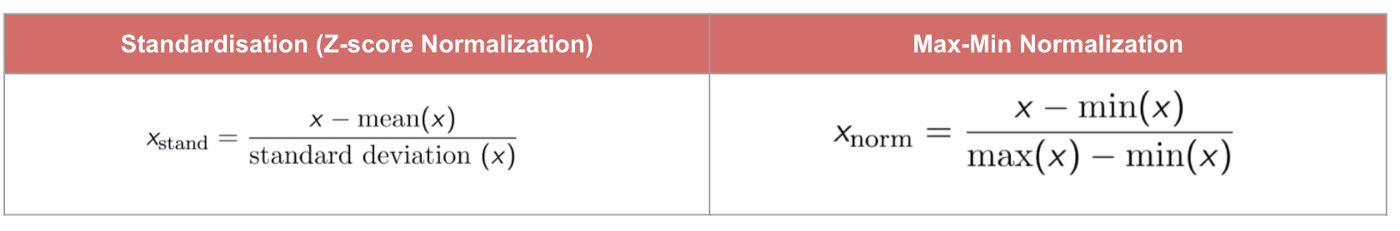

**Note: we do not use scaling on labels**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

**An important note about fit & transform methods:**

Imagine that A is our features. so **A.fit()** method, calculates the necessary statistics (Xmin,Xman,mean,standard deviation).

**A.transform()**, scales data by means of data scaling techniques.

> the note is: we only fit to **Training Data**, because we don't want to assume prior knowledge on the test set(**we don't want data leakage**) and then we can use A.transform() on Test and Train data set.


In [ ]:
X_train[0] # without scaling

pay attention to the scale of these two kde plots.

In [ ]:
sns.kdeplot(X_train[0])

In [ ]:
scaler.fit(X_train) # calculate statistics


In [ ]:
#scale on data set
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
X_train[0] #now our features are scaled

In [ ]:
sns.kdeplot(X_train[0])

## Step9: Regularization

# **Why do we use Regularization?**
*  it is use to **minimize complexity** to overcome **overfitting**(add more bias to **reduce model variance**, this happens because of bias-variance trade off)
*  penalizing the loss function (it uses a kind of hyperparameter like **lamda** to balance the formula between Regularization & loss function)

**It is something like automatically feature extracting and we prefer smaller features**

**what is lamda?**
> As I told you before this is trade of between **Error** and **Regularization**. and when lamda is lower we insist on Error and if lambda=0 we face a higher risk to have overfitting.and with higher lambda we have smoother prediction on data and lower risk for overfitting, but it is not necessarily the best answer. as I told you this a **trade-off** and a **hyperparameter**. 


## Three types of regularization:
* L1 regularization(**LASSO** regularization) : add a penatly equal to **absolut value** of the magnitude of coefficients and limit the size of the coefficients and yield **sparse** model. It is like it chooses the important coefficients and gives zero number to another.

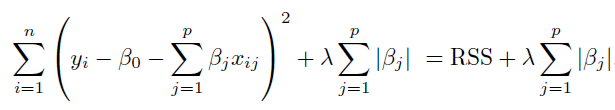
RSS=Residual Sum of Squared
* L2 regularization(**Ridge** regularization): does not necessarily **eliminate** coefficients. and it is equal to **square value** of the magnitude of coefficients.

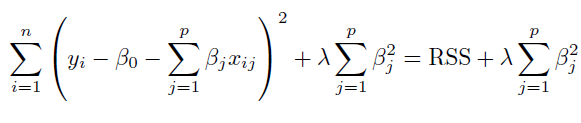
* combination of L1 & L2(Elastic Net): we have alpha that decide the ratio between them.(0=<alpha<=1)

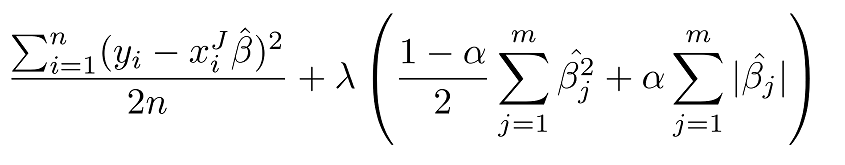

**Important Note: we do not do Regularization on bias.**

**Note: But these additional hyperparameters have cost for our models because as you know, it needs experience to find the best value for them**

### 1-Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=40) # note that hyperparameter(lambda) in sklearn is alpha. 

In [ ]:
ridge_model.fit(X_train, y_train)

In [ ]:
y_pred = ridge_model.predict(X_test)

In [ ]:
#let's Evaluate
from sklearn.metrics import mean_absolute_error, mean_squared_error
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error (y_test, y_pred)
RMSE = np.sqrt(MSE)

In [ ]:
pd.DataFrame([MAE,MSE,RMSE],index=['MAE','MSE','RMSE'],columns=['metrics'])

# how to know the optimum value of hyperparameter(here is alpha)?

# Cross Validation(CV):
It is an advanced set of methods that systematically splitting data into train and test set.(ISLR book Section 5.1 for more information)

we can achieve two goals by this method:
* Train on all the data 
* Evaluate on all the data

It has a **high accuracy** but **high complexity**.
this is known as K-fold cross-validation(usually k=10) 

we have to be aware of data leakage( we can split data set into **Train|Validation|Test**)

**Note: we can tune our hyperparameters by Cross Validation**

In [ ]:
from sklearn.linear_model import RidgeCV
ridge_cv_model = RidgeCV(alphas=(0.1, 1.0, 10.0), scoring='neg_mean_absolute_error') #scoring calculate based on our metrics. cv=None is equals to leave_one_out technique
ridge_cv_model.fit(X_train, y_train)

In [ ]:
print(f'the best hyperparameters value is: {ridge_cv_model.alpha_}')

In [ ]:
y_pred_ridge = ridge_cv_model.predict(X_test)

In [ ]:
#let's Evaluate again
from sklearn.metrics import mean_absolute_error, mean_squared_error
MAE = mean_absolute_error(y_test, y_pred_ridge)
MSE = mean_squared_error (y_test, y_pred_ridge)
RMSE = np.sqrt(MSE)

In [ ]:
pd.DataFrame([MAE,MSE,RMSE],index=['MAE','MSE','RMSE'],columns=['metrics'])

In [ ]:
ridge_cv_model.coef_ #now coefficients are smaller

In [ ]:
A=ridge_cv_model.coef_
len(A)

In [ ]:
plt.figure()
plt.bar(np.arange(1, len(A) + 1), height=np.abs(A))
plt.show()

### 2-LASSO regularization:

In [ ]:
from sklearn.linear_model import LassoCV

In [ ]:
lasso_cv_model = LassoCV(eps = 0.1 , n_alphas=100, cv=5) #here we have a period for alpha that we show it with eps and  n_alphas. cv=None is equal to three fold

In [ ]:
lasso_cv_model.fit(X_train,y_train)

In [ ]:
lasso_cv_model.alpha_

In [ ]:
y_pred_lasso = lasso_cv_model.predict(X_test)

In [ ]:
#let's Evaluate again
from sklearn.metrics import mean_absolute_error, mean_squared_error
MAE = mean_absolute_error(y_test, y_pred_lasso)
MSE = mean_squared_error (y_test, y_pred_lasso)
RMSE = np.sqrt(MSE)

In [ ]:
pd.DataFrame([MAE,MSE,RMSE],index=['MAE','MSE','RMSE'],columns=['metrics'])

In [ ]:
lasso_cv_model.coef_ #eliminated some features

In [ ]:
B=lasso_cv_model.coef_

In [ ]:
plt.figure()
plt.bar(np.arange(1, len(B) + 1), height=np.abs(B))
plt.show()

### 3-ELastic Net

In [ ]:
from sklearn.linear_model import ElasticNetCV

In [ ]:
elastic_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1],cv=5,max_iter=100000) #l1_ratio: say that which l1(close to 1) or l2(close to 0) are better?

In [ ]:
elastic_model.fit(X_train,y_train)

In [ ]:
y_pred_elastic = elastic_model.predict(X_test)

In [ ]:
#let's Evaluate again
from sklearn.metrics import mean_absolute_error, mean_squared_error
MAE = mean_absolute_error(y_test, y_pred_elastic)
MSE = mean_squared_error (y_test, y_pred_elastic)
RMSE = np.sqrt(MSE)

In [ ]:
pd.DataFrame([MAE,MSE,RMSE],index=['MAE','MSE','RMSE'],columns=['metrics'])

In [ ]:
elastic_model.coef_

In [ ]:
C=elastic_model.coef_

In [ ]:
plt.figure()
plt.bar(np.arange(1, len(C) + 1), height=np.abs(C))
plt.show()